# Question 1 
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and 
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [1]:
import pandas as pd
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep="|")
df_users=pd.DataFrame(users)
print("############ Mean age per occupation ################")
print(df_users.groupby(by='occupation')['age'].mean())


print("############ male ratio per occupation ################")
df_users['gender'] = df_users['gender'].map({'M': 1, 'F': 0})

# Calculate male ratio per occupation
male_ratio_per_occupation = (
    df_users.groupby('occupation')['gender'].mean() * 100
).reset_index()

# Sort by male ratio in descending order
male_ratio_per_occupation = male_ratio_per_occupation.sort_values(
    by='gender', ascending=False
).reset_index(drop=True) 

print(male_ratio_per_occupation)

print("############ minimum and maximum ages per occupation ################")
# Calculate minimum and maximum ages per occupation
min_max_ages_per_occupation = df_users.groupby('occupation')['age'].agg(['min', 'max']).reset_index()

print(min_max_ages_per_occupation)

print("############ mean age for each combination of Occupation and Gender ################")
# Calculate mean age for each combination of Occupation and Gender
df_users['gender'] = df_users['gender'].map({1: 'M', 0: 'F'})
mean_age_per_occupation_gender = df_users.groupby(['occupation', 'gender'])['age'].mean().reset_index()

print(mean_age_per_occupation_gender)

print("############ percentage of women and men for each occupation ################")
# Calculate the percentage of women and men for each occupation
gender_percentage_per_occupation = (
    df_users.groupby(['occupation', 'gender']).size() / df_users.groupby('occupation').size()
).reset_index(name='Percentage')

# Pivot the table to have separate columns for Male and Female percentages
gender_percentage_per_occupation = gender_percentage_per_occupation.pivot(
    index='occupation', columns='gender', values='Percentage'
).reset_index()

# Rename the columns for clarity
gender_percentage_per_occupation.columns.name = None  # Remove column index name
gender_percentage_per_occupation.columns = ['occupation', 'Female Percentage', 'Male Percentage']

print(gender_percentage_per_occupation)

############ Mean age per occupation ################
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64
############ male ratio per occupation ################
       occupation      gender
0          doctor  100.000000
1        engineer   97.014925
2      technician   96.296296
3         retired   92.857143
4      programmer   90.909091
5       executive   90.625000
6       scientist   90.322581
7   entertainment   88.888889
8          lawye

# Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them 
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start 
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia


In [10]:
import pandas as pd
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
df_euro12=pd.DataFrame(euro12)

goal_column = df_euro12[['Goals']].to_string(header=['Goals'], index=False)
print(goal_column)

# Count the number of unique teams
num_teams = df_euro12['Team'].nunique()

print(f"Number of teams participated: {num_teams}")

# Get the number of columns
num_columns = df_euro12.shape[1]

print(f"Number of columns in the dataset: {num_columns}")

# Select specific columns and create a new DataFrame
discipline = df_euro12[['Team', 'Yellow Cards', 'Red Cards']]

print(discipline.to_string(index=False))

# Sort by 'Red Cards' and then by 'Yellow Cards'
sorted_teams = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

print(sorted_teams.to_string(index=False))

# Calculate mean Yellow Cards per Team
mean_yellow_cards_per_team = discipline.groupby('Team')['Yellow Cards'].mean().reset_index()

print(mean_yellow_cards_per_team)

# Filter teams that scored more than 6 goals
filtered_teams = df_euro12[df_euro12['Goals'] > 6]

print(filtered_teams['Team'])

# Select teams that start with 'G'
selected_teams = discipline[discipline['Team'].str.startswith('G')]

print(selected_teams['Team'])

# Select the first 7 columns
selected_columns = df_euro12.iloc[:, :7]

print(selected_columns)

# Select all columns except the last 3
selected_columns_ecxept_last3 = df_euro12.iloc[:, :-3]

print(selected_columns_ecxept_last3)

# Select Team and Shooting Accuracy for England, Italy, and Russia
shooting_data = df_euro12[df_euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

print(shooting_data)


Goals
    4
    4
    4
    5
    3
   10
    5
    6
    2
    2
    6
    1
    5
   12
    5
    2
Number of teams participated: 16
Number of columns in the dataset: 35
               Team  Yellow Cards  Red Cards
            Croatia             9          0
     Czech Republic             7          0
            Denmark             4          0
            England             5          0
             France             6          0
            Germany             4          0
             Greece             9          1
              Italy            16          0
        Netherlands             5          0
             Poland             7          1
           Portugal            12          0
Republic of Ireland             6          1
             Russia             6          0
              Spain            11          0
             Sweden             7          0
            Ukraine             5          0
               Team  Yellow Cards  Red Cards
            Denmar

# Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [2]:
import pandas as pd
import numpy as np


# Create a Series of random numbers from 1 to 4
random_numbers_from_one_to_four = pd.Series(np.random.randint(1, 5, size=100), name='RandomNumberOneToFour')

# Create a Series of random numbers from 1 to 3
random_numbers_from_one_to_three = pd.Series(np.random.randint(1, 4, size=100), name='RandomNumberOneToThree')


# Create a Series of random numbers from 10,000 to 30,000
random_numbers_from_10k_to_30k = pd.Series(np.random.randint(10000, 30001, size=100), name='RandomNumber10kTo30k')

# Create a DataFrame by joining the two Series
df_random_series = pd.concat([random_numbers_from_one_to_four, random_numbers_from_one_to_three ,random_numbers_from_10k_to_30k ], axis=1)

# Rename the columns
df_random_series = df_random_series.rename(columns={'RandomNumberOneToFour': 'bedrs', 'RandomNumberOneToThree': 'bathrs','RandomNumber10kTo30k': 'price_sqr_meter'})

# Display the DataFrame with renamed columns
print("\nDataFrame with Renamed Columns:")
print(df_random_series)

# Concatenate the three Series into a one-column DataFrame
bigcolumn = pd.concat([random_numbers_from_one_to_four, random_numbers_from_one_to_three, random_numbers_from_10k_to_30k], axis=0)

print(bigcolumn)
print(bigcolumn.reset_index(drop=True))



DataFrame with Renamed Columns:
    bedrs  bathrs  price_sqr_meter
0       1       2            16632
1       2       1            21868
2       3       2            22932
3       4       1            11806
4       4       2            18744
..    ...     ...              ...
95      4       2            15841
96      2       3            11193
97      2       3            12664
98      3       1            20891
99      1       3            10634

[100 rows x 3 columns]
0         1
1         2
2         3
3         4
4         4
      ...  
95    15841
96    11193
97    12664
98    20891
99    10634
Length: 300, dtype: int32
0          1
1          2
2          3
3          4
4          4
       ...  
295    15841
296    11193
297    12664
298    20891
299    10634
Length: 300, dtype: int32


# Question 4
Wind Statistics 
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or 
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL 
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on 
January 2 1961) for the first 52 weeks.

In [5]:
import pandas as pd
from io import StringIO
from datetime import datetime


# Create a DataFrame from the string data
#data = pd.read_csv(StringIO(wind_data), delim_whitespace=True)
data = pd.read_csv("https://raw.githubusercontent.com/TavGeorgian/Tavleen.Kaur.BDAT1004PS4/main/wind.txt", delim_whitespace=True)

# Display the DataFrame
date_columns = ['Yr', 'Mo', 'Dy']
data['Date'] = pd.to_datetime(data[date_columns].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Drop the original date columns
data = data.drop(date_columns, axis=1)

# Step 3. Set the 'Date' column as the datetime index
data = data.set_index('Date')

# Step 4. Fix the year in the datetime index
def fix_year(x):
    current_year = datetime.now().year
    return x.replace(year=x.year-100) if x.year > current_year else x

data.index = data.index.map(fix_year)

# Display the DataFrame after fixing the year
print("\nAfter Fix:")
print(data)
print("Data Type of Date Index:", data.index.dtype)

# Assuming 'data' is your DataFrame
missing_values = data.isnull().sum()

# Display the number of missing values for each location
print("Missing Values for Each Location:")
print(missing_values)

# Assuming 'data' is your DataFrame
total_non_missing_count = data.count().sum()

# Display the total number of non-missing values
print("Total Non-Missing Values in the DataFrame:", total_non_missing_count)
# Assuming 'data' is your DataFrame
mean_windspeed = data.mean().mean()

# Display the mean windspeed
print("Mean Windspeed over all Locations and Times:", mean_windspeed)

# Assuming 'data' is your DataFrame
loc_stats = data.agg(['min', 'max', 'mean', 'std'])

# Display the loc_stats DataFrame
print("Location Statistics:")
print(loc_stats)

# Assuming 'data' is your DataFrame
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)

# Display the day_stats DataFrame
print("Day Statistics:")
print(day_stats)

# Assuming 'data' is your DataFrame
average_windspeed_january = data[data.index.month == 1].mean()

# Display the average windspeed in January for each location
print("Average Windspeed in January for Each Location:")
print(average_windspeed_january)

# Assuming 'data' is your DataFrame
yearly_data = data.resample('Y').mean()

# Display the downsampled DataFrame to yearly frequency
print("Downsampled to Yearly Frequency:")
print(yearly_data)


# Assuming 'data' is your DataFrame
monthly_data = data.resample('M').mean()

# Display the downsampled DataFrame to monthly frequency
print("Downsampled to Monthly Frequency:")
print(monthly_data)

# Assuming 'data' is your DataFrame
weekly_data = data.resample('W').mean()

# Display the downsampled DataFrame to weekly frequency
print("Downsampled to Weekly Frequency:")
print(weekly_data)

# Assuming 'data' is your DataFrame
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[:52]

# Display the statistics for the first 52 weeks
print("Weekly Statistics for the First 52 Weeks:")
print(weekly_stats)




After Fix:
              RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL  \
Date                                                                        
1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04   
1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25   
1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50   
1978-12-30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46   
1978-12-31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.

# Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold

In [3]:
import pandas as pd
chipo_dataset = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",delimiter='\t')
chipo=pd.DataFrame(chipo_dataset)

# Display the first 10 entries of the chipo DataFrame
print("First 10 Entries of chipo:")
print(chipo.head(10))

# Assuming 'chipo' is your DataFrame
num_observations = chipo.shape[0]

# Display the number of observations
print("Number of Observations in the Dataset:", num_observations)

# Assuming 'chipo' is your DataFrame
num_columns = chipo.shape[1]

# Display the number of columns
print("Number of Columns in the Dataset:", num_columns)

# Assuming 'chipo' is your DataFrame
column_names = chipo.columns

# Display the names of all the columns separated by commas
print("Column Names:", ', '.join(column_names))

# Assuming 'chipo' is your DataFrame
index_info = chipo.index

# Display the information about the index
print("Index Information:")
print(index_info)

# Assuming 'chipo' is your DataFrame
most_ordered_item = chipo['item_name'].value_counts().idxmax()

# Display the most-ordered item
print("Most-Ordered Item:", most_ordered_item)

# Assuming 'chipo' is your DataFrame
most_ordered_item_count = chipo['item_name'].value_counts().max()

# Display the number of times the most-ordered item was ordered
print("Number of Times the Most-Ordered Item was Ordered:", most_ordered_item_count)

# Assuming 'chipo' is your DataFrame
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()

# Display the most-ordered item in the 'choice_description' column
print("Most-Ordered Item in 'choice_description':", most_ordered_choice)

# Assuming 'chipo' is your DataFrame
total_items_ordered = chipo['quantity'].sum()

# Display the total number of items ordered
print("Total Number of Items Ordered:", total_items_ordered)


# Assuming 'chipo' is your DataFrame
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

# Assuming 'chipo' is your DataFrame
item_price_type = chipo['item_price'].dtype

# Display the data type of the 'item_price' column
print("Data Type of 'item_price' column:", item_price_type)

# Assuming 'chipo' is your DataFrame
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))

# Assuming 'chipo' is your DataFrame
item_price_type_lambada = chipo['item_price'].dtype

# Display the data type of the 'item_price' column
print("Data Type of 'item_price_lambada' column:", item_price_type_lambada)


# Assuming 'chipo' is your DataFrame
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()

# Display the total revenue for the period
print("Total Revenue for the Period:", total_revenue)

# Assuming 'chipo' is your DataFrame
num_orders = chipo['order_id'].nunique()

# Display the number of orders made in the period
print("Number of Orders Made in the Period:", num_orders)

# Assuming 'chipo' is your DataFrame
average_revenue_per_order = chipo.groupby('order_id')['revenue'].sum().mean()

# Display the average revenue amount per order
print("Average Revenue Amount Per Order:", average_revenue_per_order)

# Assuming 'chipo' is your DataFrame
num_different_items = chipo['item_name'].nunique()

# Display the number of different items sold
print("Number of Different Items Sold:", num_different_items)






First 10 Entries of chipo:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3   

C:\Users\DELL\AppData\Local\Temp\ipykernel_16072\4096639605.py:60: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)


# Question 6
Create a line plot showing the number of marriages and divorces per capita in the 
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

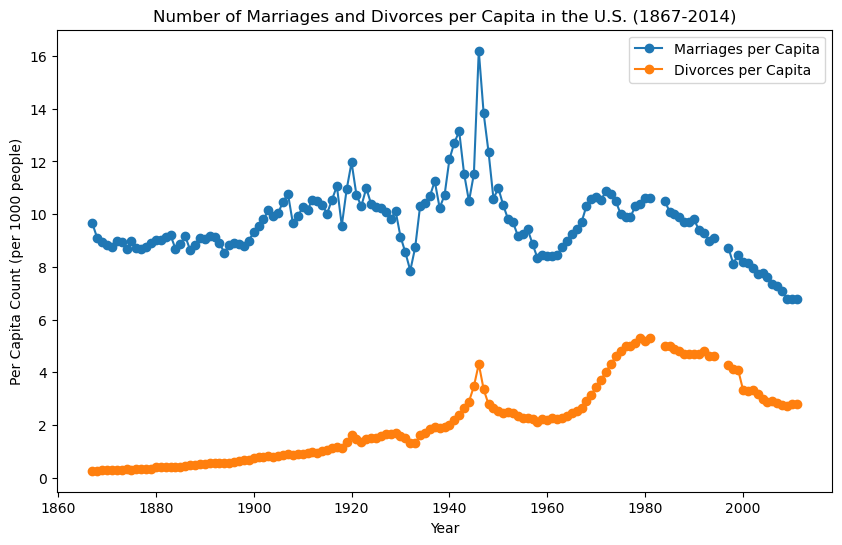

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
#https://raw.githubusercontent.com/theSanataniNerd/files/main/us-marriages-divorces-1867-2014.csv
data = pd.read_csv("https://raw.githubusercontent.com/TavGeorgian/Tavleen.Kaur.BDAT1004PS4/main/us-marriages-divorces-1867-2014.csv")

df = pd.DataFrame(data)

# Calculate per capita values
df['Marriages_Per_Capita'] = df['Marriages'] / df['Population'] * 1000
df['Divorces_Per_Capita'] = df['Divorces'] / df['Population'] * 1000

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Marriages_Per_Capita'], label='Marriages per Capita', marker='o')
plt.plot(df['Year'], df['Divorces_Per_Capita'], label='Divorces per Capita', marker='o')

plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Per Capita Count (per 1000 people)')
plt.legend()

plt.show()


# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!


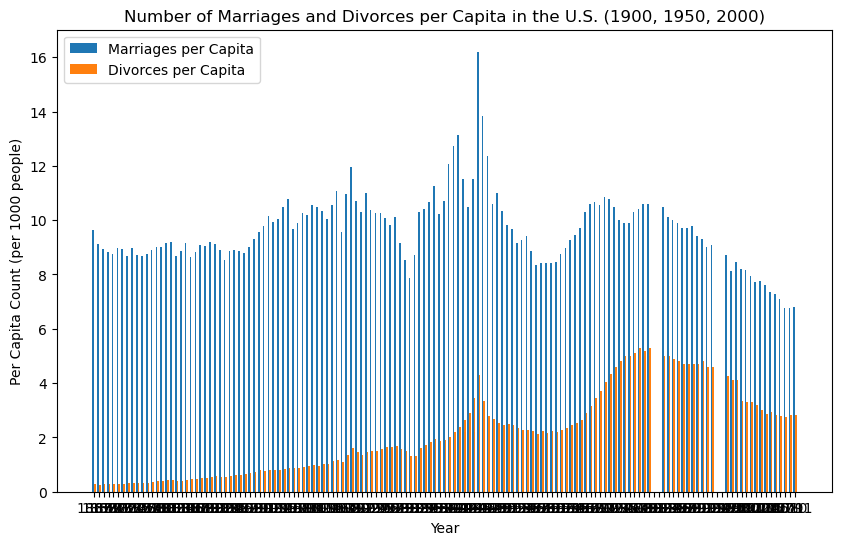

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data  = pd.read_csv("https://raw.githubusercontent.com/TavGeorgian/Tavleen.Kaur.BDAT1004PS4/main/us-marriages-divorces-1867-2014.csv")

df = pd.DataFrame(data)

# Calculate per capita values
df['Marriages_Per_Capita'] = df['Marriages'] / df['Population'] * 1000
df['Divorces_Per_Capita'] = df['Divorces'] / df['Population'] * 1000

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.35
bar_positions = range(len(df))

plt.bar(bar_positions, df['Marriages_Per_Capita'], width=bar_width, label='Marriages per Capita', align='center')
plt.bar([pos + bar_width for pos in bar_positions], df['Divorces_Per_Capita'], width=bar_width, label='Divorces per Capita', align='center')

plt.title('Number of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Per Capita Count (per 1000 people)')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], df['Year'])
plt.legend()

plt.show()


# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


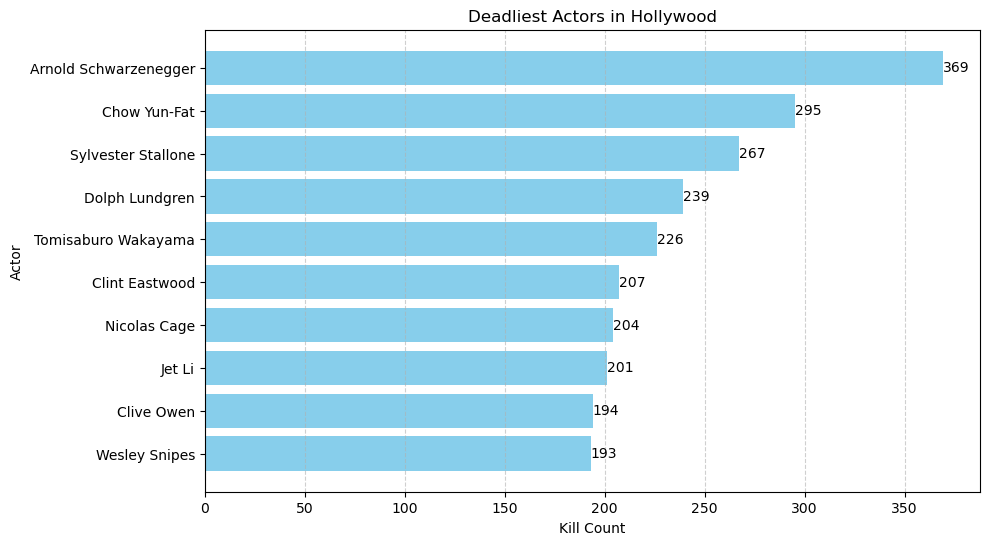

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = pd.read_csv("https://raw.githubusercontent.com/TavGeorgian/Tavleen.Kaur.BDAT1004PS4/main/actor_kill_counts.csv")


df = pd.DataFrame(data)

# Sort the DataFrame by kill count in descending order
df = df.sort_values(by='Count', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))

plt.barh(df['Actor'], df['Count'], color='skyblue')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Label each bar with the actor's name
for index, value in enumerate(df['Count']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.show()


# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.


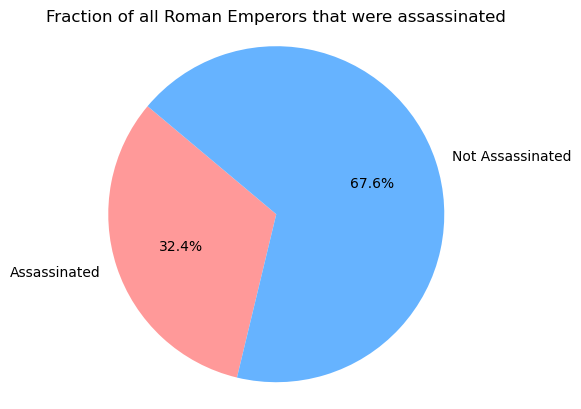

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/TavGeorgian/Tavleen.Kaur.BDAT1004PS4/main/roman-emperor-reigns.csv')

# Calculate the fraction of all Roman Emperors that were assassinated
assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated']
total_emperors = len(data)
fraction_assassinated = len(assassinated_emperors) / total_emperors

# Create the pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [fraction_assassinated, 1 - fraction_assassinated]
colors = ['#ff9999','#66b3ff']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fraction of all Roman Emperors that were assassinated')
plt.show()


# Question 10
Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

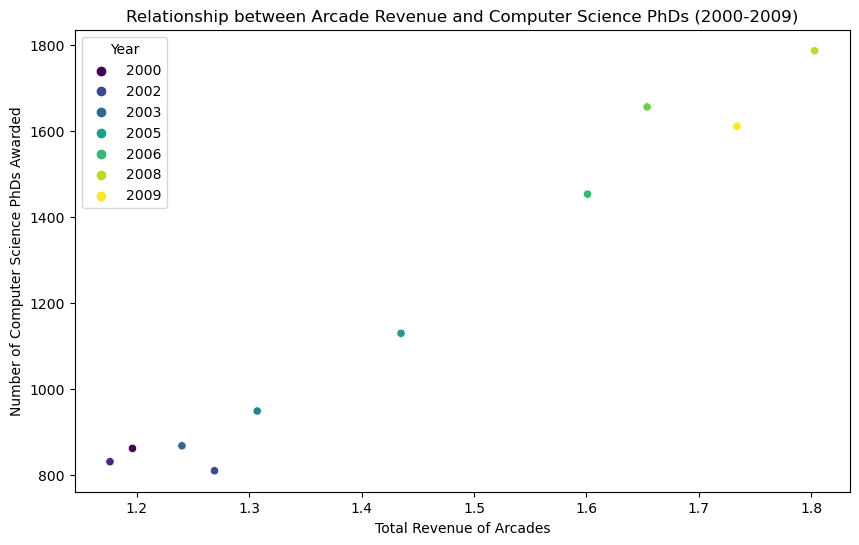

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace this with your actual data)
data = pd.read_csv("https://raw.githubusercontent.com/TavGeorgian/Tavleen.Kaur.BDAT1004PS4/main/arcade-revenue-vs-cs-doctorates.csv")
df = pd.DataFrame(data)

# Plotting using seaborn for color mapping
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', data=df, palette='viridis')

# Set labels
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')
plt.xlabel('Total Revenue of Arcades')
plt.ylabel('Number of Computer Science PhDs Awarded')

# Display legend
scatter_plot.legend(title='Year')

plt.show()
